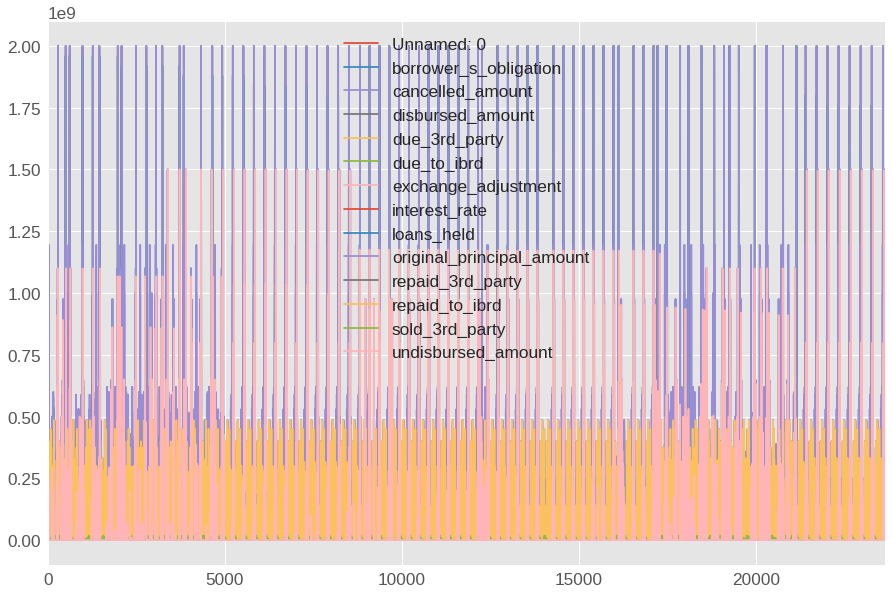

In [2]:
# To really use the Quandl API. Limited usage doesn't require authtoken.

import numpy as np
from sklearn import preprocessing, cross_validation
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
%matplotlib inline
import matplotlib
import seaborn as sns
import quandl
import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

style.use('ggplot')
df = pd.read_csv('./indiaData.csv')
df.plot()

In [3]:
df

,Unnamed: 0,agreement_signing_date,board_approval_date,borrower,borrower_s_obligation,cancelled_amount,closed_date_most_recent_,country,country_code,disbursed_amount,...,loan_type,loans_held,original_principal_amount,project_id,project_name_,region,repaid_3rd_party,repaid_to_ibrd,sold_3rd_party,undisbursed_amount
0,0,2012-11-05T00:00:00,2012-03-13T00:00:00,CONTROLLER OF AID ACCOUNTS & AUDIT,2.685235e+07,0.000000e+00,2018-03-31T00:00:00,India,IN,2.685235e+07,...,FSL,3.200000e+08,3.200000e+08,P096018,IN: Assam State Roads Project,South Asia,0.0,0.000000e+00,0.0,2.931476e+08
1,1,2010-08-14T00:00:00,2010-06-03T00:00:00,CONTROLLER OF AID ACCOUNTS & AUDIT,1.424967e+08,0.000000e+00,2016-07-31T00:00:00,India,IN,1.424967e+08,...,FSL,4.506000e+08,4.506000e+08,P100954,IN: AP Water Sector Improvement Pro,South Asia,0.0,0.000000e+00,0.0,3.081033e+08
2,2,2000-08-11T00:00:00,2000-06-27T00:00:00,INDIAN RENEWABLE ENERGY DEVLOPMNT AGENCY,2.517250e+07,2.600000e+07,2008-03-31T00:00:00,India,IN,5.400000e+07,...,SNGL CRNCY,2.517250e+07,8.000000e+07,P049770,REN EGY II,South Asia,0.0,2.882750e+07,0.0,0.000000e+00
3,3,2000-10-18T00:00:00,2000-09-05T00:00:00,CONTROLLER OF AID ACCOUNTS & AUDIT,1.445867e+08,1.010000e+08,2007-12-31T00:00:00,India,IN,2.800000e+08,...,SNGL CRNCY,1.445867e+08,3.810000e+08,P010566,Gujarat Highways,South Asia,0.0,1.354133e+08,0.0,0.000000e+00
4,4,2006-05-02T00:00:00,2006-01-19T00:00:00,POWER GRID CORPORATION OF INDIA LIMITED,3.280850e+08,0.000000e+00,2011-07-31T00:00:00,India,IN,4.000000e+08,...,SNGL CRNCY,3.280850e+08,4.000000e+08,P086414,IN: Power System Development Projec,South Asia,0.0,7.191500e+07,0.0,0.000000e+00
5,5,2010-07-09T00:00:00,2010-06-01T00:00:00,SMALL INDUSTRIES DEVELOPMENT BK OF INDIA,1.786444e+08,0.000000e+00,2015-06-30T00:00:00,India,IN,1.786444e+08,...,FSL,2.000000e+08,2.000000e+08,P119043,IN: Microf-Scaling Up Sustnble & Re,South Asia,0.0,0.000000e+00,0.0,2.135560e+07
6,6,2010-07-22T00:00:00,2010-06-03T00:00:00,CONTROLLER OF AID ACCOUNTS & AUDIT,6.302500e+04,0.000000e+00,2015-09-30T00:00:00,India,IN,6.302500e+04,...,FSL,2.521000e+07,2.521000e+07,P091031,IN: Industrial Pollution Management,South Asia,0.0,0.000000e+00,0.0,2.514698e+07
7,7,2001-07-26T00:00:00,2001-06-21T00:00:00,CONTROLLER OF AID ACCOUNTS & AUDIT,4.322500e+07,0.000000e+00,2001-12-31T00:00:00,India,IN,7.500000e+07,...,SNGL CRNCY,4.322500e+07,7.500000e+07,P055490,KARN SAL I,South Asia,0.0,3.177500e+07,0.0,0.000000e+00
8,8,2001-07-27T00:00:00,2001-06-21T00:00:00,CONTROLLER OF AID ACCOUNTS & AUDIT,2.757722e+08,1.018777e+08,2008-06-30T00:00:00,India,IN,4.871223e+08,...,SNGL CRNCY,2.757722e+08,5.890000e+08,P071244,Grand Trunk Road Improvement Projec,South Asia,0.0,2.113500e+08,0.0,0.000000e+00
9,9,2007-06-08T00:00:00,2007-04-19T00:00:00,CONTROLLER OF AID ACCOUNTS & AUDIT,5.648599e+07,7.500000e+06,2016-07-31T00:00:00,India,IN,6.699360e+07,...,SNGL CRNCY,7.649239e+07,9.450000e+07,P100789,IN: AP Community Tank Management Pr,South Asia,0.0,1.050761e+07,0.0,2.000640e+07


In [4]:
head_10 = df.head(10)

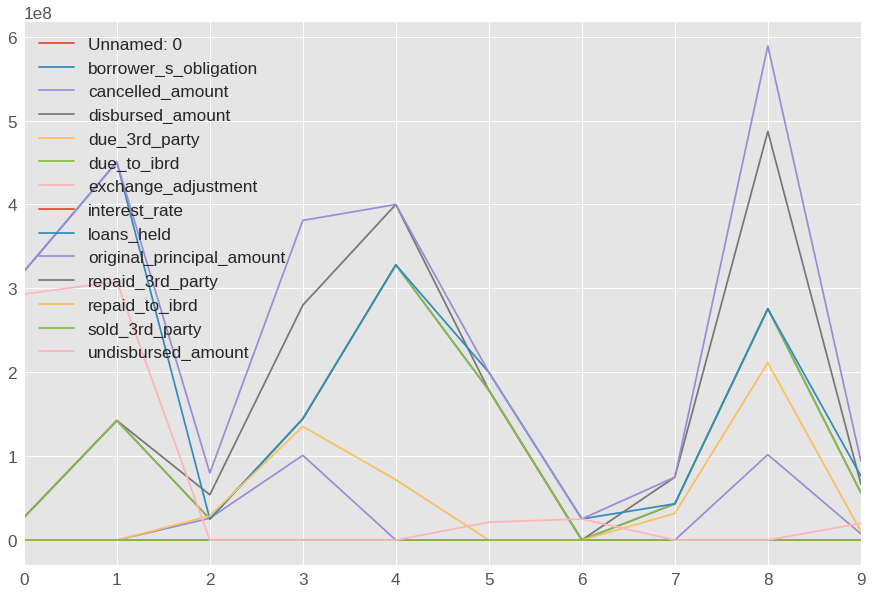

In [7]:
head_10.plot()